# Biodiversity in National Parks

## Overview
The goal of this analysis is to identify patterns in the conservation status of species across national parks, uncover which species and parks are most at risk, and provide actionable insights to help the National Parks Service focus its conservation efforts effectively.

## Project Goals
- Investigate the distribution of species across parks.
- Analyze conservation statuses and identify trends.
- Visualize data to highlight patterns and insights.
- Provide actionable recommendations for conservation efforts.

In [2]:
# Code to import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#configure visualizations for better readability in in plot generated by seaborn and matplotlib
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)




In [3]:
# we will use pandas to load our csv files.

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

#preview the dataset using head(). This will just allow us to make sure that the data set is loading properly.
print("Species dataset preview: ")
display(species.head())

print("\nObservations Dataset Preview:")
display(observations.head())

Species dataset preview: 


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN



Observations Dataset Preview:


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
#Checking the structure of the datasets. Here we can identify information such as number of rows and column/ column names and data types. 
print("Species Dataset Info:")
species.info()

print("\nOBservations Dataset Info:")
observations.info()

Species Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB

OBservations Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [5]:
#Lets now look at unique values in columns
#Using the .unique() method returns an array of unique values from a column

print("Unique Species Categories:")
print(species['category'].unique(),"\n")

print("Conservation Statuses:")
print(species['conservation_status'].unique(),"\n")

print("Park Names:")
print(observations["park_name"].unique(),"\n")

Unique Species Categories:
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant'] 

Conservation Statuses:
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery'] 

Park Names:
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park'] 



In [8]:
#checking for missing values in the observations dataset
print("Missing values in Observations dataset:")
print(observations.isnull().sum())

Missing values in Observations dataset:
scientific_name    0
park_name          0
observations       0
dtype: int64


In [9]:
#checking for missing values in the species dataset
print("Missing values in Species dataset:")
print(species.isnull().sum())

Missing values in Species dataset:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


In [11]:
# we will use "no intervention" as a placeholder for the conservation_status column meaning that missing values will indicate that no special conservatio measures are in place for the species. 

#using the .fillna() method to replace NaN values 
species["conservation_status"].fillna("No Intervention", inplace=True)

#verify the change 
print("\nMissing values after filling:")
print(species.isnull().sum())


Missing values after filling:
category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64


In [12]:
# To improve data quality we will also check for duplicates in our data

print("Duplicate rows in Species dataset:", species.duplicated().sum())

print("Duplicate rows in observation dataset:", observations.duplicated().sum())

Duplicate rows in Species dataset: 0
Duplicate rows in observation dataset: 15


In [6]:
# removing duplicates in observation dataset

observations.drop_duplicates(inplace=True)
print("Duplicates removed. Remaining duplicates in observation dataset:",observations.duplicated().sum())

Duplicates removed. Remaining duplicates in observation dataset: 0


#Data Grouping
In the next steps we will begin grouping different categories in our dataset in order to aggregate and summarize the data. this can help us identify patterns and trends.

In [7]:
#Grouping the species dataset by category and count the number of species in each 
category_counts = species.groupby("category")["scientific_name"].count()
print("Species Count By Category:")
print(category_counts)

#group species by conservation status and count
conservation_counts = species.groupby("conservation_status")["scientific_name"].count()
print("\nSpecies Count by Conservation Status:")
print(conservation_counts)

Species Count By Category:
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64

Species Count by Conservation Status:
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
Name: scientific_name, dtype: int64


#Graphing grouped Species dataset

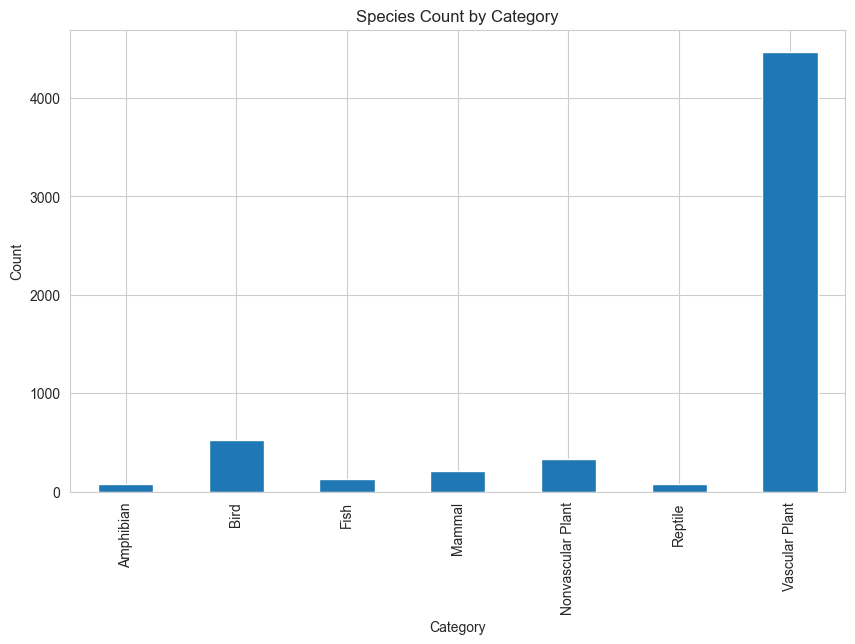

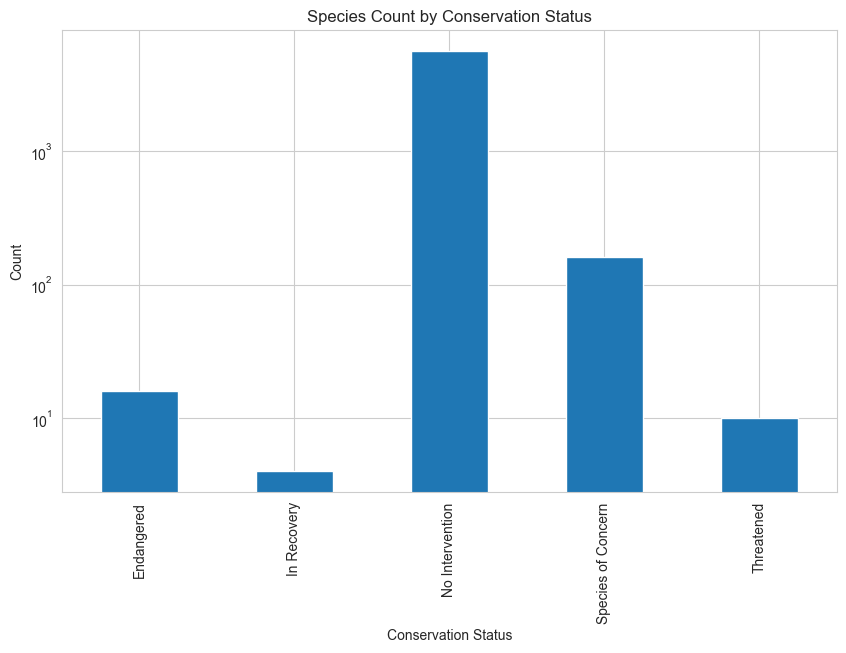

In [ ]:
#using pandas .plot() method
# used matplotlib for the logarithimic y-axis logy=True
# Plot category counts
category_counts.plot(kind='bar', title="Species Count by Category", xlabel="Category", ylabel="Count")
plt.show()

# Plot conservation status counts
#conservation_counts.plot(kind='bar', title="Species Count by Conservation Status", xlabel="Conservation Status", ylabel="Count")
#plt.show()

# Use a log scale for the y-axis
#This scales the y-axis logarithmically, compressing large values and stretching smaller values for better comparison.
conservation_counts.plot(kind='bar', title="Species Count by Conservation Status", xlabel="Conservation Status", ylabel="Count", logy=True)
plt.show()





In [10]:
# We will use this data and merge bot datasets on the scientific_name column. This will ensure that sonservation statuses are included in the observations data.

merged_data = observations.merge(species, on = "scientific_name")

# Groupd the merged dataset by park name and conservation status 

park_status_observations = merged_data.groupby(['park_name', "conservation_status"])['observations'].sum().reset_index()

#for better visualization I an pivoting the data so each park becomes a row and conservation status become columns
pivot_data = park_status_observations.pivot(index = 'park_name', columns= 'conservation_status', values= 'observations').fillna(0)

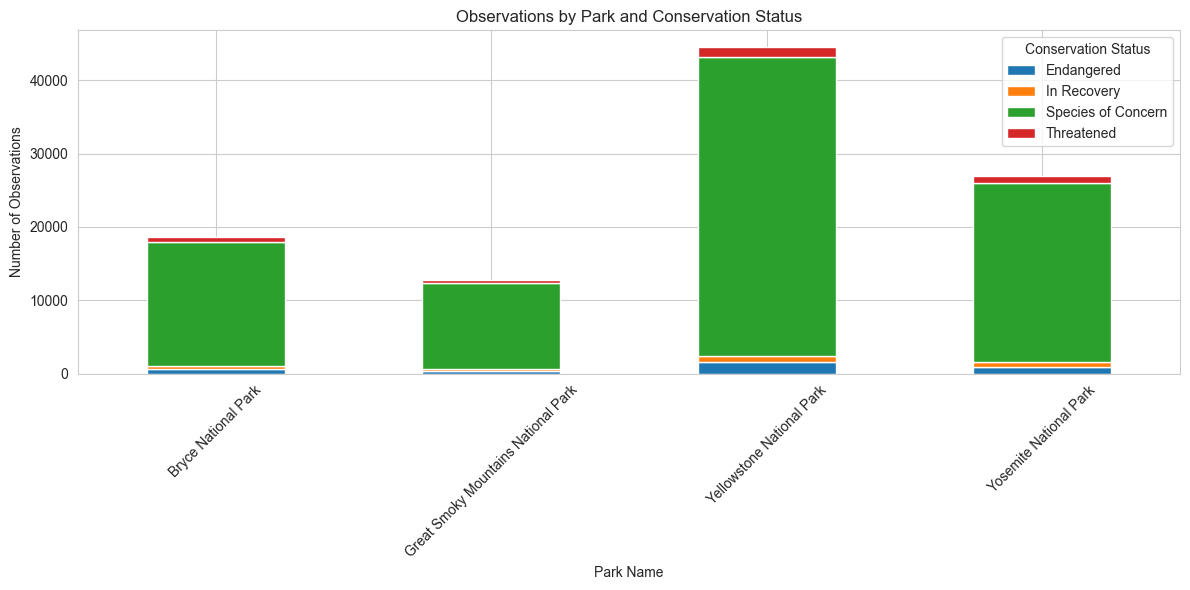

In [11]:
#creating a stacked bar plot to show how observations are distributed by conservation status across parks:
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), title='Observations by Park and Conservation Status')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.legend(title='Conservation Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
